**Deep Learning Chapter 02**
------------

Author: Shahrokh Abbasi-Rad
<br>
Date: 6th November
<br>
Source: Data Camp course: 

https://www.datacamp.com/home

**Instrcutor:** Dan Becker



**Table of Contents**
<br> 1. Loss Function
<br> 2. Gradient Descent
<br> 3. Simple Example of Weight Updates
<br> 4. Back Propagation
<br> 5. HyperParameters: Batch and Epoch
<br>

<div align='right'>
    خب صرف داشتن شکل و قیافه ی یه شبکه ی عصبی که تضمین نمی کنه اون شبکه ی عصبی خوب کار میکنه. ما باید ببینیم که شبکه چه خطایی داره و بعد اون خطا رو بررسی کنیم
    <br>
    برای این کار بذار شما رو با مفهومی آشنا کنم به نام لاس فانکشن
    <br>
    </div>
    
<br>
<br>

<div align = 'center'>
    <font size=5, color= '#003366'>
        <b>Loss Function </b>
    </font>
    </div>
    
<br>
<br>
<div align='right'>
    <font size=3>
        به ازای هر دسته وزنی که ما داریم به تعداد ورودی ها ما خروجی داریم پس به همون تعداد هم خطا داریم. پس مثلا اگه ما ده تا ورودی داریم به ازای هر دسته از وزن ها ده تا خطا داریم ولی خب اینجوری که نمی تونیم با شبکه کار کنیم که. باید همه ی خطا ها رو با رو هم بذاریم و یه عدد ارائه بدیم به عنوان معیاری از عملکرد اون مدل (منظور اون شبکه با اون وزن های مورد نظر) که خب به اون تابعی که همه ی اون خطا ها رو با هم جمع می کنه می گویند لاس فانکشن
        <br>
        یکی از لاس فانکشن های خیلی معروف که البته برای رگرسیون بیشتر انجام می دهند، تابع مین اسکوئر ارور هست
        <br>
        <br>
        خب داستان تا یه حدی الآن باید برات مشخص شده باشه دیگه. نه؟ الآن ما دنبال وزن هایی هستیم که کمترین لاس فانکشن رو بهمون بده
        <br>
        <br>
        اینجا یه مثال میزنم از یه حالتی که ما فقط دو تا وزن داریم. در این حالت به راحتی می تونیم عملکرد مدل رو برای تمام مقادیر وزن ها پلات کنیم که در زیر این کار رو کردیم
    </font>
    </div>

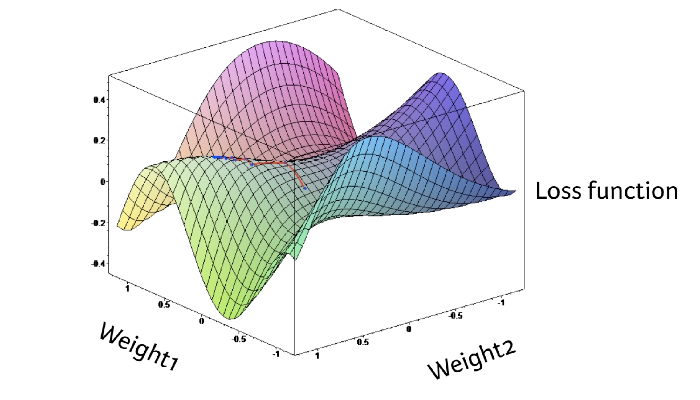

In [6]:
from PIL import Image
image_name1 = 'Photos/loss_function.png'
im1 = Image.open(image_name1)
im1_resized = im1.resize((700, 400), Image.NEAREST)
im1_resized.save('Photos/resized_loss_function.png')
from IPython.display import Image
Image(filename = "Photos/resized_loss_function.png")

<div align='right'>
    <font size=2>
    حالا که من اومدم و این نوت بوک ذو دارم دوره می کنم متوجه یه سوال میشم. سوالم اینه که الآن این نمداری که کشیدی به ازای کدام ورودیه. خب به ازای
    هر ورودی که باید این عوض بشه. 
    <br>خب اول احساس کردم که چه سوال خوبی داری می پرسی. ولی خب صادقانه بگم اندکی بعد متوجه شدم که سوال احمقانه است. اولا که ما به ازای هر دسته وزنی که میدیم همه ی ورودی ها رو به شبکه میدیم و به ازای همه شون خروجی محاسبه می کنیم و بعد به ازای هر ورودی یک خطا خواهیم داشت. که بر اساس اینکه لاس فانکشنمون چیه اون خطاها رو با هم ترکیب می کنیم و خطای شبکه رو به ازای اون وزن ها اعلام میکنیم. 
        <br> حالا اگه ورودی عوض شد چی؟ خب همین سوالت رو میگم غلطه دیگه
        <br> شما همیشه ورودی کم هم داری. هر چی هر چی ورودی بیشتر داشته باشی بهتره. همه ی ورودی هایی که داری رو میاری و هر بار همه ی ورودی ها رو به شبکه میدی

<br>
<div align = 'center'>
    <font size=5, color= '#003366'>
        <b>Gradient Descent </b>
    </font>
    </div>

<br>
<br>
<div align='right'>
    <font size=2>
        در واقع رسیدن به بهترین مدل یعنی رسیدن به وزن هایی که کمترین لاس فانکشن رو دارن یعنی پیدا کردن گلوبال مینیموم در این فضای جستجو که خودت حساب کن چقدر پیچیده ست. برای شبکه ی عصبی ای که هزارتا وزن داره فضای جستجو یه فضای هزار بعدی ست
        <br>
        الگوریتمی که باهاش این گلوبال مینیموم رو پیدا میکنیم رو میگن 
        <b>گرادیان دیسنت</b>
        به طور خلاصه می شه گفت که گرادیان دیسنت اینطوری کار میکنه
    </font>
    </div>
    
<font size=2>
    Imagine you are in a pitch dark field 
    <br>
    Want to find the owest point
    <br>
    Feel the ground to see how it slopes
    <br>
    Take a small step downhill
    <br>
    Repeat until it is uphill in every direction
    </font>
        

<br>

<div align = 'right'>
    <font size=2.5>
        بذار برای حالت بسیار ساده ای که فقط یه وزن داریم بررسی کنیم ببینیم گرادیان دیسنت چطوری کار میکنه
        <br>
         از یه نقطه ی رندم شروع میکنیم که در شکل هم نشون دادیم. در همین نقطه ای که هستیم یه خط مماس به منحنی رسم می کنیم که در واقع خارجی ها بهش میگن تانژانت لاین. شیب این خط مماس شیب لاس فانکشن رو برای وزن موجود به دست میدهد.حالا ما از این شیب چه استفاده ای میکنیم؟ از این شیب استفاده می کنیم تا جهت حرکت رو در فضای جستجو مشخص کنیم. الآن در مثال زیر شیب مثبت است پس ما در جهت برعکس اون حرکت می کنیم. با همین فرمون اگه بری جلو مطمئن باش که مینیموم رو پیدا خواهی کرد.
        <br>
        <br>
        به ویدئوی زیر دقت کن
        <br>
        <br>

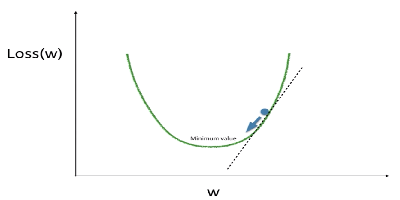

In [44]:
import time
from PIL import Image
import IPython as IP

image_names = ['GD_Frame01.png','GD_Frame02.png', 'GD_Frame03.png',\
               'GD_Frame04.png', 'GD_Frame05.png', 'GD_Frame06.png',\
              'GD_Frame07.png']

#for i in range(0,5):
i = 1
im = Image.open('Photos/' + image_names[i])
im_resized = im.resize((400, 200), Image.NEAREST)
im_resized.save('Photos/' + 'resized_' + image_names[i])  
IP.display.Image(filename ='Photos/'+'resized_' + image_names[i])
#time.sleep(1)

i = 6
im = Image.open('Photos/' + image_names[i])
im_resized = im.resize((400, 200), Image.NEAREST)
im_resized.save('Photos/' + 'resized_' + image_names[i])  
IP.display.Image(filename ='Photos/'+'resized_' + image_names[i])
#time.sleep(1)

<div align='right'>
    <font size=2>
        یه مثال الآن ارائه میدیم از یه شبکه و میشینیم براش خروجی تعیین میکنیم و برای خروجی اش خطا رو محاسبه میکنیم و بعد به صورت دستی وزن ها رو براش جوری عوض میکنیم که بتونیم خطا رو براش صفر کنیم
        <br>
    </font>
    </div>
    
**Example 01:**

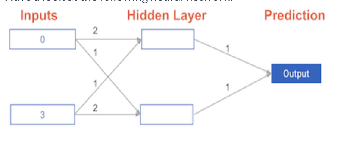

In [59]:
from PIL import Image
import IPython as IP
image_name2 = 'Photos/chapter02_ex01.png'
im2 = Image.open(image_name2)
im2_resized = im2.resize((350, 150), Image.NEAREST)
im2_resized.save('Photos/resized_chapter02_ex01.png')
IP.display.Image(filename = "Photos/resized_chapter02_ex01.png")

In [2]:
import numpy as np
def predict_with_network(input_arg, weights):
    
    node_0_input = (input_arg * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value: node_1_output
    node_1_input = (input_arg * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])

    # Calculate model output (do not apply relu)
    last_layer_input = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(last_layer_input)
    
    return(model_output)

def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [3, -3],
             'output': [1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


<div align='right'>
    <font size = 2>
        اینجا می خوام یه مثال بزنم که بشینیم و لاس فانکشن هم حساب کنیم
        <br>
        یه شبکه رو با دو تا وزن مختلف امتحان میکنیم و برای هر دسته از وزن ها لاس فانکشن رو که همون مین اسکوئر ارور هست رو حساب می کنیم
    </font>
    </div>
    
**Example 02:**

In [51]:
from sklearn.metrics import mean_squared_error


weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]),'node_1': np.array([1. , 1.5]),'output': np.array([1. , 1.5])}
target_actuals = [1, 3, 5, 7]
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row,weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals ,model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


<br>
<div align = 'center'>
    <font size=5, color= '#003366'>
        <b>Gradient Descen: How to update Weights </b>
    </font>
    </div>

<br>

<div align='right'>
    <font size=2>
        فرض کن می خوایم یه وزنی رو آپدیت کنیم. 
        <br>
        اول شیب رو یعنی در واقع شیب تابع لاس فانکشن برای اون وزن رو محاسبه می کنیم
        <br>
        فرض کن که شیب مثبته. در این حالت باید بر خلاف شیب حرکت کنیم یعنی از اون لاس فانکشن بریم پایین.
        <br>
        چیزی که الآن مهمه اینه که قدممون رو چقدری برداریم. برای این کار میایم مقدار فعلی وزن رو از شیب کم می کنیم. این در واقع می شه قدمی که بر میداریم. 
    </font>
    </div>
    
    
<br>
<br>
<div align = 'center'>
    <font size=5, color= '#003366'>
        <b>Learning Rate</b>
    </font>
    </div>

<br>

<div align='right'>
    <font size=2>
        در واقع مساله اینجاست که ما دنبال مینیموم هستیم و وقتی که داریم توی فضای سرچ قدم میزیم باید حواسمون باشه که قدممون رو خیلی بلند برنداریم. اگه بلند برداریم یهو یه چاله چوله ای رو رد می کنیم و اون چاله ممکنه که گلوبال مینیموم باشه. بنابراین یک پارامتری رو تعیین میکنیم به نام لرنینگ ریت و اون در واقع استپ سایز رو برامون تنظیم میکنه
        <br>
        یعنی اول شیب رو در لرنینگ ریت ضرب می کنیم و بعد وزن ها رو آپدیت می کنیم
        <br>
        <br>
        سوال: چطوری اون شیب رو در اون نقطه پیدا کنیم. این چیزیه که من نسبت بهش گنگ هستم. در واقع اینجا باید از محاسبات عددی استفاده کنیم. بر طبق گفته ی آقای دن بکر این کار از طریق مشتق گیری و با استفاده از قانون زنجیر یا همون چین رول انجام می شه که ما لازم نیست خیلی نگرانش باشیم و کراس و تنسورفلو اینکار رو برامون انجام میدهند. ولی این داره اینارو برای فتولوها میگه نه برای تویی که ریاضیت خوبه. قانون چین رول که ترس نداره. توی دبیرستان تو کلی از این قانون استفاده میکردی. به ویدئوی زیر نگاه کن می فهمی که این قانون رو میدونی(بعد وقت بذار ببین چطوری می تونی توی نوت بوک از یوتیوب فیلم بیاری) 
    </font>
    </div>
    
**Example 03:**

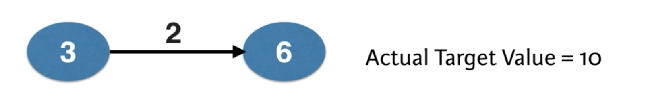

In [63]:
from PIL import Image
import IPython as IP
image_name3 = 'Photos/weightUpdate.png'
im3 = Image.open(image_name3)
im3_resized = im3.resize((650, 100), Image.NEAREST)
im3_resized.save('Photos/resized_weightUpdate.png')
IP.display.Image(filename = "Photos/resized_weightUpdate.png")


<div align='right'>
    <font size=۲>
        سوال این بود که چطوری شیب رو محاسبه میکنیم دیگه. الآن ما یه حالت خیلی ساده رو در نظر می گیریم که فقط یه ورودی داریم و یه وزن تنها. حالا می خوایم حساب کنیم که شیب چطوری به دست میاد. یعنی توی فضای سرچ یه بعدی (چون فقط یه وزن داریم) شیب این تابع لاس فانکشن در جایی که الآن هستیم یعنی نقطه ای که با وزن الآن شبکه مشخض میش، چنده؟
        <br>
        برای محاسبه ی وزن سه تا چیز رو باید در هم ضرب کنیم
        که من اینجا به همون انگلیسی می نویسم
    </font>
    </div>

<font size=2>
    <b>
    1. The slope of the loss function with respect to the value at the node we feed into
    <br>
    2. The value of the node that feeds into our weight
    <br>
    3. Slope of the activation function with respect to value we feed into 
    </b>
    </font>
    
<div align='right'>
    <font size=۲>
        حالا بذار برای این حالت من مرحله مرحله برات برم جلو
        <br>
        <b>مرحله ی اول</b>
        <br>
        میگه شیب لاس فانکشن نسبت به مقدار نودی که می خوام بهش فید کنیم که اون نود الآن در این حالت پردیکشن مدل هست
        <br>
        بنابراین شیب تابع مین اسکوئر به این صورت به دست میاد
        <div align='center'>
            2 * (Prtedicted Value - Actual Value) = 2 * Error
        </div>
        که میشه برابر با 
        <br>-8
        <br>
        <b>مرحله ی دوم</b>
        <br>
        مقدار نورونی که با اون وزنه به نورون دیگه فید می کنیم
        <br>
        3
        <br>
        <b>مرحله ی سوم</b>
        <br>
        شیب تابع اکتیویشن فانکشن که اینجا برابر با یکه چون تابع ما تابع واحده
        <br>
        <br>
        <br>
        بنابراین شیب تابع لاس فانکشن مورد نظر برای این وزن برابر خواهد بود با 
        <br>
        2 * -4 * 3 = -24
        <br>
        و حالا اگه لرنینگ ریت رو برابر با یک صدم بگیریم مقدار لازم برای آپدیت کردن وزن برابر خواهد بود با
        <br>
        -24 * 0.01 = -0.24
        <br>
        و بنابراین مقدار جدید وزن برابر با خواهد بود با
        <br>
        2 - (-0.24) = 2.24 
        <br>
        این کار رو باید برای همه ی وزن ها انجام بدی
        </font>
    </div>
 
 
**By and Large:**
<br>  When plotting the <font color='red'>*mean-squared error loss function* </font> against predictions, 
<br> the slope is 2 * x * (xb-y), 
<br> or 2 * input_data * error
<br>
<br>**Example 04: Let's Code to calculte slope**

        

In [69]:

weights = np.array([0,2,1])
input_data = np.array([1,2,3])
target = 0

# Calculate the predictions: preds
preds = (weights*input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


<div align='right'>
    <font size=۲>
        در این مثال مدل ما هیچ لایه ی پنهانی ندارد و سه ورودی دارد که صاف می رود به خروجی. بنابراین ما سه تا وزن داریم که در مرحله ی اول شیب رو برای هر سه تا وزن محاسبه کردیم
        <br> البته فراموش نشه لاس فانکشن مین اسکوئر ارور هست و اکتیویشن فانکشن نداریم
    </font>

**Example 05: Let's code to update weights**

In [68]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - (learning_rate * slope)

# Get updated predictions: preds_updated
preds_updated = (input_data*weights_updated).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)


7
5.04


<div align='right'>
    <font size=۲>
        در واقع با یک مرحله آپدیت کردن به روش گرادیان دیسنت و با لرنینگ ریت یک صدم باعث شد که خطای پیش بینی مدل از ۷ به تقریبا ۵ کاهش پیدا کند
        حالا در مثال بعدی می خوایم بندازیم توی حلقه و ۲۰ بار وزن ها مون رو آپدیت کنیم
    </font>
    </div>
    
**Example 06:**

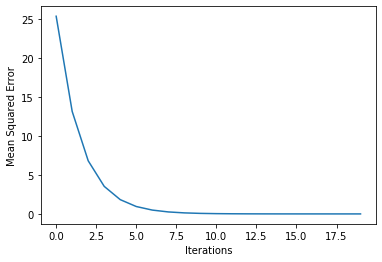

In [97]:
import matplotlib.pyplot as plt 
input_data = np.array([1,2,3])
weights = np.array([0,2,1])
target = 0

n_updates = 20
mse_hist = []

def get_slope(input_data, target, weights):
    prediction = (input_data * weights).sum()
    error = prediction - target
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    model_output = (input_data*weights).sum()
    mse = model_output*model_output
    return(mse)
    

for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - learning_rate * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()
 


<br>
<div align = 'center'>
    <font size=5, color= '#003366'>
        <b>BackPropagation</b>
    </font>
    </div>

<br>

<div align='right'>
    <font size=2>
        همونطور که فوروارد پروپگیشن داده ی ورودی رو میگیره و از طریق نرورن های لایه های مختلف اون رو میرسونه به داده ی خروجی و خروجی رو پیش بینی می کنه، بک پروپگیشن میاد *خطای* محاسبه شده رو برمیگردونه به عقب تا برسه به ورودی و توی راه طبق گرادیان دیسنت وزن ها رو اصلاح میکنه

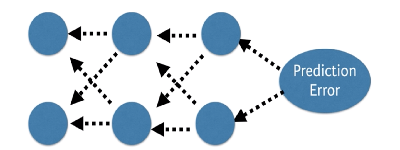

In [102]:
from PIL import Image
import IPython as IP
image_name4 = 'Photos/backpropagation.png'
im4 = Image.open(image_name4)
im4_resized = im4.resize((400, 150), Image.NEAREST)
im4_resized.save('Photos/resized_backpropagation.png')
IP.display.Image(filename = "Photos/resized_backpropagation.png")


<div align='right'>
    <font size=2>
        سعی نکن صاف بپری توی جزئیات بک پروپگیشن. یه دید هلی کوپتری اول ازش بگیر
        <br>در واقع بک پروپگیشن یعنی اینکه ما بیایم در همون نقطه ای از فضای جستجو که هستیم (که این نقطه توسط وزن های همین الآن مدل تعیین میشود) شیب تابع لاس فانکشن نسبت به تک تک وزن ها رو تخمین بزنیم
        <br>
        حالا یه نکته اینجا مطرح میشه و اونم اینه که ما برای اینکه لاس فانکشن در اون نقطه رو بدونیم باید خطا رو بدونیم پس یعنی برای هر بار که می خوایم بک پروپگیشن کنیم باید یه بار فوروارد پروپگیشن کنیم (پیش بینی کنیم) و خطا رو محاسبه کنیم و در واقع اون خطا رو پروپگیت می کنیم. یعنی از طریق اون خطا شیب ها رو محاسبه کنیم                
        <br>
        <br>
        یه مثال با جزئیات از بک پروپگیشن می زنیم
        <br>
        مدل زیر رو در نظر بگیر که یک لایه ی پنهان داره و از اکتیویشن فانکشن رلیو استفاده میکنه
         

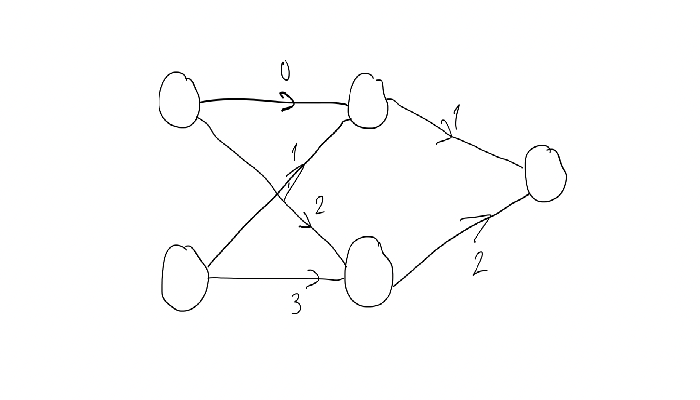

In [3]:
from PIL import Image
import IPython as IP
image_name5 = 'Photos/bp_frame01.png'
im5 = Image.open(image_name5)
im5_resized = im5.resize((700, 400), Image.NEAREST)
im5_resized.save('Photos/resized_bp_frame01.png')
IP.display.Image(filename = "Photos/resized_bp_frame01.png")

<div align='right'>
    <font size=2>
    <br>همونطور که قبلا هم گفتیم اول باید فوروارد پروپگیشن انجام بدیم و خروجی و مهمتر از اون خطا رو محاسبه کنیم
        <br> 
        که دراین حالت خروحی برابر با ۷ خواهد بود و از آنجا که مقدار واقعی برابر با چهار است مقدار خطا ۳ خواهد بود
        </font>
        </div>

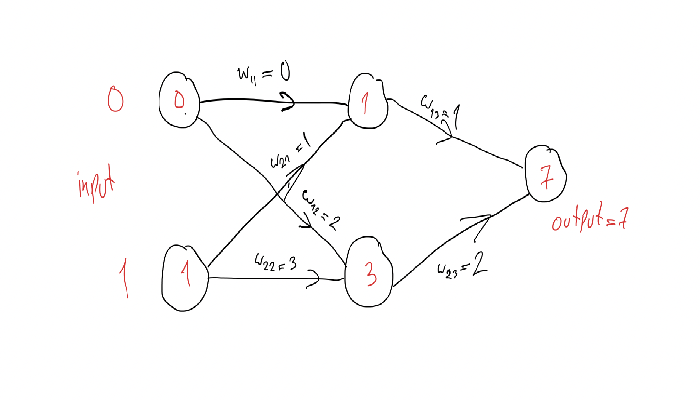

In [116]:
from PIL import Image
import IPython as IP
image_name6 = 'Photos/bp_frame02.png'
im6 = Image.open(image_name6)
im6_resized = im6.resize((700, 400), Image.NEAREST)
im6_resized.save('Photos/resized_bp_frame02.png')
IP.display.Image(filename = "Photos/resized_bp_frame02.png")

<div align='right'>
    <font size=2>
        الآن باید چیکار کنیم باید شیب تابع لاس فانکشن که تابع مین اسکوئر ارور هست رو برای دو تا وزن اول حساب کنیم. برای اینکار به مقدار خطا احتیاج داریم و همونطور که گفتیم این مقدار از حاصلضرب سه چیز به دست می آید
        <br> الآن من می خوام شیب تابع لاس فانکشن رو در نقطه ی الآن مدل نسبت به وزن 
        <br>w13
        <br>حساب کنم. سه چیز رو همونطور که گفتیم باید در هم ضرب کنیم
        <br> 
        <b> <font size=3> اول </font></b> 
        مقداری نورونی (خروجی آن نورون) که اون وزن داره ازش خارج میشود
        <br> <b><font size=3> 1 </font></b>
        <br>
        <b> <font size=3> دوم </font></b>
        شیب تابع لاس فانکشن در نورونی که وزن بهش وارد می شود که در این حالت این نورون همان نورون خروجی است بنابراین شیب، همانطور که گفتیم برابر می شود با دو برابر مقدار خطا یعنی 
        <br> <b><font size=3> 6 </font></b>
        <br> 
        <b> <font size=3> سوم </font></b>
        شیب اکتیویشن فانکشن که چون تابع رلیو هست برابر است با 
        <br> <b><font size=3> 1 </font></b>
        <br>
        بنابراین به همین ترتیب  می توانیم مقادیر شیب یا همان گرادیان را برای وزن های بین لایهی خروجی و لایه ی پنهان را به صورت زیر محاسبه کنیم که برابر با مقادیر ۶ و ۱۸ می باشند که در شکل زیر به رنگ سبز نشان داده شده اند
    </font>
    </div>
    
       

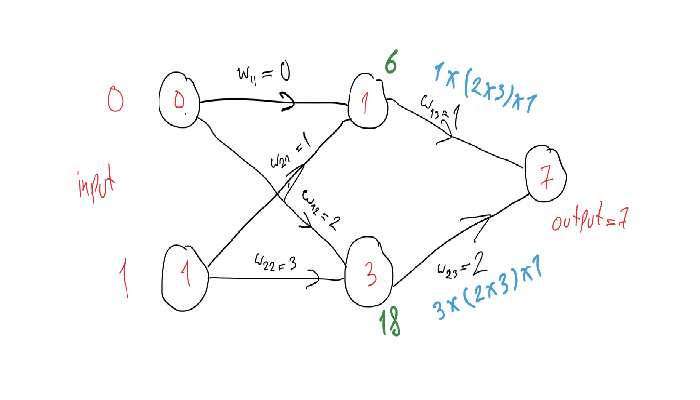

In [117]:
from PIL import Image
import IPython as IP
image_name7 = 'Photos/bp_frame03.png'
im7 = Image.open(image_name7)
im7_resized = im7.resize((700, 400), Image.NEAREST)
im7_resized.save('Photos/resized_bp_frame03.png')
IP.display.Image(filename = "Photos/resized_bp_frame03.png")

<div align='right'>
    <font size = 2>
        حالا همین کار رو ادامه می دهیم برای لایه های عقب تر با این تفاوت که الآن دیگه مقدار شیب تابع لاس فانکش در نورونی که وزن بهش وارد میشه رو داریم و لازم نیست به صورت دو برابر خطا اون رو محاسبه کنیم
        <br>
        در شکل زیر این کار رو برای بقیه ی وزن ها انجام داده ایم

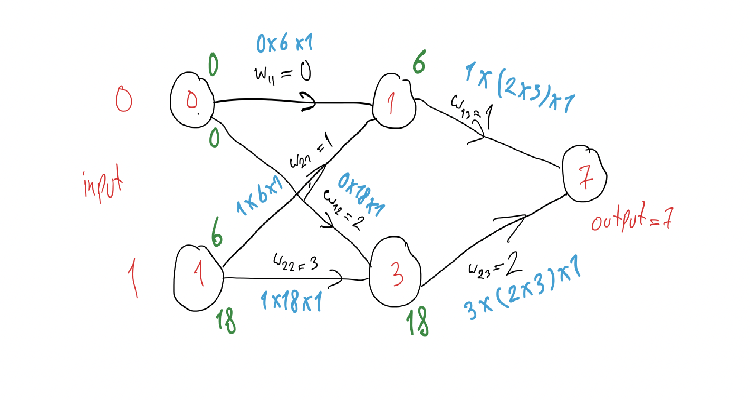

In [120]:
from PIL import Image
import IPython as IP
image_name8 = 'Photos/bp_frame04.png'
im8 = Image.open(image_name8)
im8_resized = im8.resize((750, 400), Image.NEAREST)
im8_resized.save('Photos/resized_bp_frame04.png')
IP.display.Image(filename = "Photos/resized_bp_frame04.png")

<div align='right'>
    <font size=2>
        به همین با کلاسی. الآن مقدار گرادیان رو برای همه ی وزنها به دست آوردیم و الآن به راحتی می تونیم اونها رو در یک لرنینگ ریتی ضرب کنیم و باهاشون وزن ها رو آپدیت کنیم
        <br>در واقع با توجه به چیزهایی که دکتر عرب می گفت. ما یه فوروارد پروپگیشن انجام دادیم و خطا رو محاسبه کردیم و بعد با استفاده از بک پروپگیشن اومدیم حساب کردیم که هر نورون چقدر مقصر بوده و بهش اعلام کردیم میزان تقصیری که به گردنش هست. که بر اساس اون می تونه وزنهاشو آپدیت کنه

<br>
<div align = 'center'>
    <font size=5, color= '#003366'>
        <b>BackPropagation: Recap</b>
    </font>
    </div>

<br>

<font size=3>

<br>1. Start at some random set of weights
<br>2. Use forward propagation to make a prediction
<br>3. Use backward propagation to calculate the slope of the loss function w.r.t each weight
<br>4. Multiply that slope by the learning rate, and subtract from the current weights
<br>5. Keep going with that cycle until you get to a flat part
    
</font>

<br>
<div align = 'center'>
    <font size=5, color= '#003366'>
        <b>Two Important Hyper Parameters: Batch & Epoch</b>
    </font>
    </div>

<br>

<div align='right'>
    <font size=2>
        دو تا به اصطلاح خودشون هایپرپارامتر می خوام برات معرفی کنم. که عبارتند از: ایپوک و بچ
        <br>
        فرض کن هزار تا تصویر داری برای ترین کردن شبکه. خب بسیار واضحه که نمی تونی هزارتا رو با هم بدی به شبکه که اون رو ترین کنی و محبوری اون هزار تا رو توی چند مرحله بدی. پس مثلا میای هر بار ۱۰۰ تاشو به شبکه میدی. به این میگن یک بچ و بنابراین شما برای اینکه یه دور همه ی داده ها رو برای ترین بدی به شبکه باید ۱۰ تا بچ رو بدی به شبکه. هر بار که همه ی داده ها رو برای ترین به شبکه دادی یعنی همه ی اون ده تا بج رو دادی به این میگن یه ایپوک
    </font>
    </div>